In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 20201130_153306_009.jpg to 20201130_153306_009.jpg


In [ ]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
pic = imageio.imread("20201130_153306_009.jpg")
plt.figure(figsize = (5,5))
plt.imshow(pic)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Printing the shape and dimension. Some basic properties

In [ ]:
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (4032, 3024, 3)
Image Hight 4032
Image Width 3024
Dimension of Image 3


The shape of the ndarray shows that it is a three-layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green, Blue. So, if we calculate the size of an RGB image, the total size will be counted as height x width x 3


In [ ]:
print('Image size {}'.format(pic.size)) 
print('Maximum RGB value in this image {}'.format(pic.max())) 
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 36578304
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [ ]:
print('Value of only R channel {}'.format(pic[ 100, 50, 0])) 
print('Value of only G channel {}'.format(pic[ 100, 50, 1])) 
print('Value of only B channel {}'.format(pic[ 100, 50, 2]))


Value of only R channel 115
Value of only G channel 116
Value of only B channel 108


Lets view the image in different channels

In [ ]:
plt.title('R channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
RCH=pic[ : , : , 0]
plt.imshow(RCH)
plt.show()

In [ ]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 1]) 
plt.show()

In [ ]:
plt.title('B channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 2]) 
plt.show()

Now, we can also able to change the number of RGB values. As an example, let’s set the Red, Green, Blue layer for following Rows values to full intensity.


In [ ]:
pic[50:150 , : , 0] = 255 # full intensity to those pixel's R channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

In [ ]:
pic[200:300 , : , 1] = 255 # full intensity to those pixel's G channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()


In [ ]:
pic[350:450 , : , 2] = 255 # full intensity to those pixel's B channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

To make it more clear let’s change the column section too and this time we’ll change the RGB channel simultaneously.


In [ ]:
# set value 200 of all channels to those pixels which turns them to white 
pic[ 50:450 , 400:600 , [0,1,2] ] = 200  
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

Now, we know that each pixel of the image is represented by three integers. Splitting the image into separate color components is just a matter of pulling out the correct slice of the image array.


In [ ]:
import numpy as np 
pic = imageio.imread("20201130_153306_009.jpg") 
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in zip(range(3), ax):     
     # create zero matrix        
     split_img = np.zeros(pic.shape, dtype="uint8") 
     # 'dtype' by default: 'numpy.float64'  # assing each channel      
     split_img[ :, :, c] = pic[ :, :, c] # display each channel     
     ax.imshow(split_img)


Lets plot in grey scale <3

In [ ]:
pic = imageio.imread("20201130_153306_009.jpg") 
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])   
gray = gray(pic) 
plt.figure( figsize = (5,5))  
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.show()

What if we want to discard some high or low value pixels? Follpwing code will help 

In [ ]:
low_pixel = pic < 20  
# to ensure of it let's check if all values in low_pixel are True or not 
if low_pixel.any() == True:     
    print(low_pixel.shape)

(4032, 3024, 3)


In [ ]:
# randomly choose a value 
import random

# load the orginal image

pic = imageio.imread("20201130_153306_009.jpg")

# set value randomly range from 25 to 225 - these value also randomly choosen
pic[low_pixel] = random.randint(25,225)
# display the image
plt.figure( figsize = (5,5))
plt.imshow(pic)
plt.show()


Image masking is an image processing technique that is used to remove the background from which photographs those have fuzzy edges, transparent or hair portions.


Now, we’ll create a mask that is in shape of a circular disc. First, we’ll measure the distance from the center of the image to every border pixel values. And we take a convenient radius value, and then using logical operator, we’ll create a circular disc. It’s quite simple, let’s see the code.

In [ ]:
# Load the image 
pic = imageio.imread("20201130_153306_009.jpg")  
total_row , total_col , layers = pic.shape  
'''     Create vector.     Ogrid is a compact method of creating a multidimensional     ndarray operations in single lines.     
for ex:     
>>> ogrid[0:5,0:5]     
output: [array([[0],
                [1],
                [2],
                [3],
                [4]]),
         array([[0, 1, 2, 3, 4]])]  
''' 
x , y = np.ogrid[:total_row , :total_col]  
cen_x , cen_y = total_row/2 , total_col/2   
distance_from_the_center = np.sqrt((x-cen_x)**2 + (y-cen_y)**2)  
# Select convenient radius value 
radius = (total_row/5) 
circular_pic = distance_from_the_center > radius 
pic[circular_pic] = 0 
plt.figure(figsize = (5,5)) 
plt.imshow(pic)  
plt.show()


In [ ]:
from skimage.color import rgb2hsv
rgb_img = imageio.imread("20201130_153306_027.jpg")  
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
sat_img = hsv_img[:, :, 1]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(sat_img)
ax0.set_title("Sat image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving New folder.zip to New folder.zip


In [ ]:
!unzip -uq "/content/New folder.zip" -d "/content"

In [ ]:
pic = imageio.imread("/content/New folder/20201130_155250_001.jpg")
plt.figure(figsize = (5,5))
plt.imshow(pic)

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Printing the images from a folder from an R channel

In [ ]:

plt.figure(figsize=(100,100))
test_folder=r'/content/New folder'
for i in range(10):
    file = random.choice(os.listdir("New folder"))
    image_path= os.path.join("New folder", file)
    img=mpimg.imread(image_path)
    plt.title ("R channel")
    RCH=img[ : , : , 0]
  
    ax=plt.subplot(1,10,i+1)
   
    plt.imshow(RCH)

G channel 

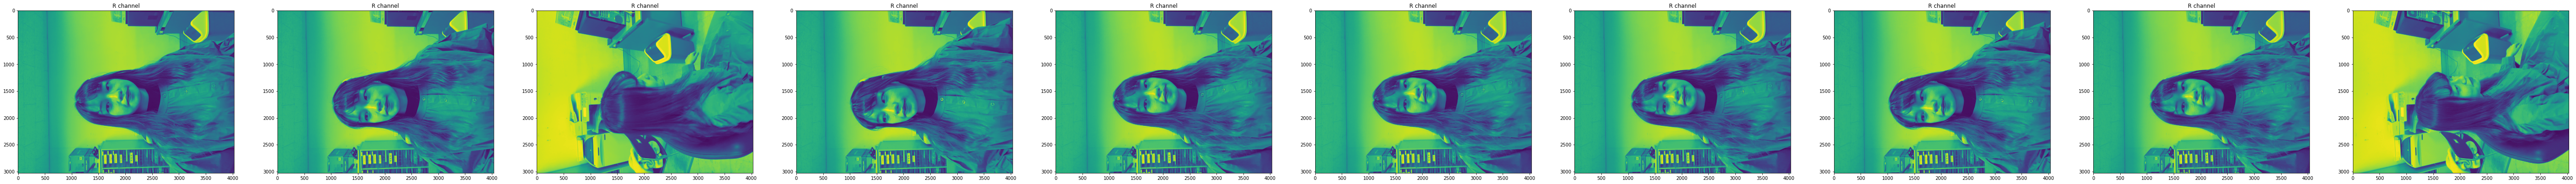

In [ ]:
plt.figure(figsize=(100,100))
test_folder=r'/content/New folder'
for i in range(10):
    file = random.choice(os.listdir("New folder"))
    image_path= os.path.join("New folder", file)
    img=mpimg.imread(image_path)
    plt.title ("G channel")
    RCH=img[ : , : , 1]
  
    ax=plt.subplot(1,10,i+1)
   
    plt.imshow(RCH)

B channel

In [ ]:
plt.figure(figsize=(100,100))
test_folder=r'/content/New folder'
for i in range(10):
    file = random.choice(os.listdir("New folder"))
    image_path= os.path.join("New folder", file)
    img=mpimg.imread(image_path)
    plt.title ("G channel")
    RCH=img[ : , : , 0]
  
    ax=plt.subplot(1,10,i+1)
   
    plt.imshow(RCH)

In [ ]:
import matplotlib
plt.figure(figsize=(100,100))
test_folder=r'/content/New folder'
for i in range(5):
    file = random.choice(os.listdir("New folder"))
    image_path= os.path.join("New folder", file)
    img=mpimg.imread(image_path)
    matplotlib.rcParams.update({'font.size': 22})
    plt.title ("H channel")
    hsv_img = rgb2hsv(img)
    H=hsv_img[ : , : , 0]
  
    ax=plt.subplot(1,5,i+1)
   
    plt.imshow(H)


In [ ]:
import matplotlib
plt.figure(figsize=(100,100))
test_folder=r'/content/New folder'
for i in range(5):
    file = random.choice(os.listdir("New folder"))
    image_path= os.path.join("New folder", file)
    img=mpimg.imread(image_path)
    matplotlib.rcParams.update({'font.size': 22})
    plt.title ("S channel")
    hsv_img = rgb2hsv(img)
    H=hsv_img[ : , : , 1]
  
    ax=plt.subplot(1,5,i+1)
   
    plt.imshow(H)

In [ ]:
import matplotlib
plt.figure(figsize=(100,100))
test_folder=r'/content/New folder'
for i in range(5):
    file = random.choice(os.listdir("New folder"))
    image_path= os.path.join("New folder", file)
    img=mpimg.imread(image_path)
    matplotlib.rcParams.update({'font.size': 22})
    plt.title ("V channel")
    hsv_img = rgb2hsv(img)
    H=hsv_img[ : , : , 2]
  
    ax=plt.subplot(1,5,i+1)
   
    plt.imshow(H)